## Principal Component Regression

**Principal Component Regression** regression involves a two step procedure.
1. We find principal components of the train data.
2. We perform least square regression using those principal components as input features.

We can choose how many Principal components to use are predictors, as we add more principal components the bias of the model goes down but variance increase. **PCR** can also be thought of as a regularization technique.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load diabaties dataset for PCR
from sklearn import datasets
data = datasets.load_diabetes(as_frame=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0fb2bd820>,
      dtype=object)

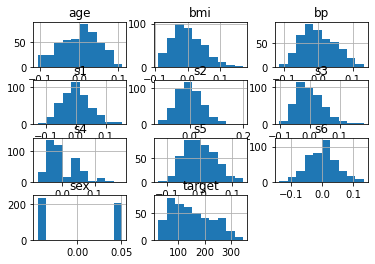

In [3]:
data["frame"].hist()

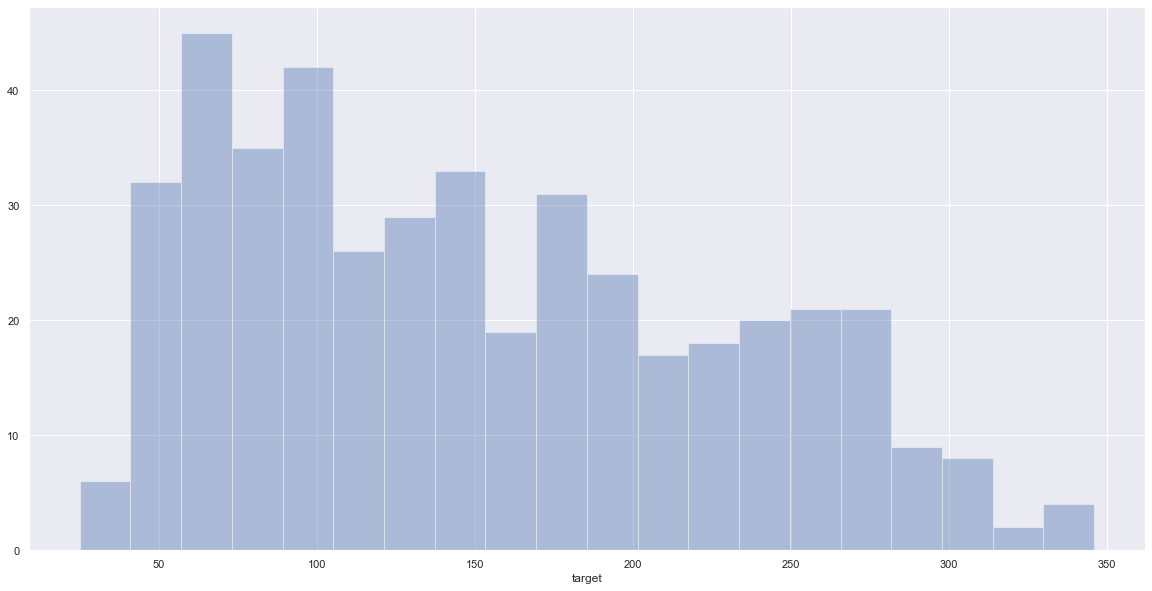

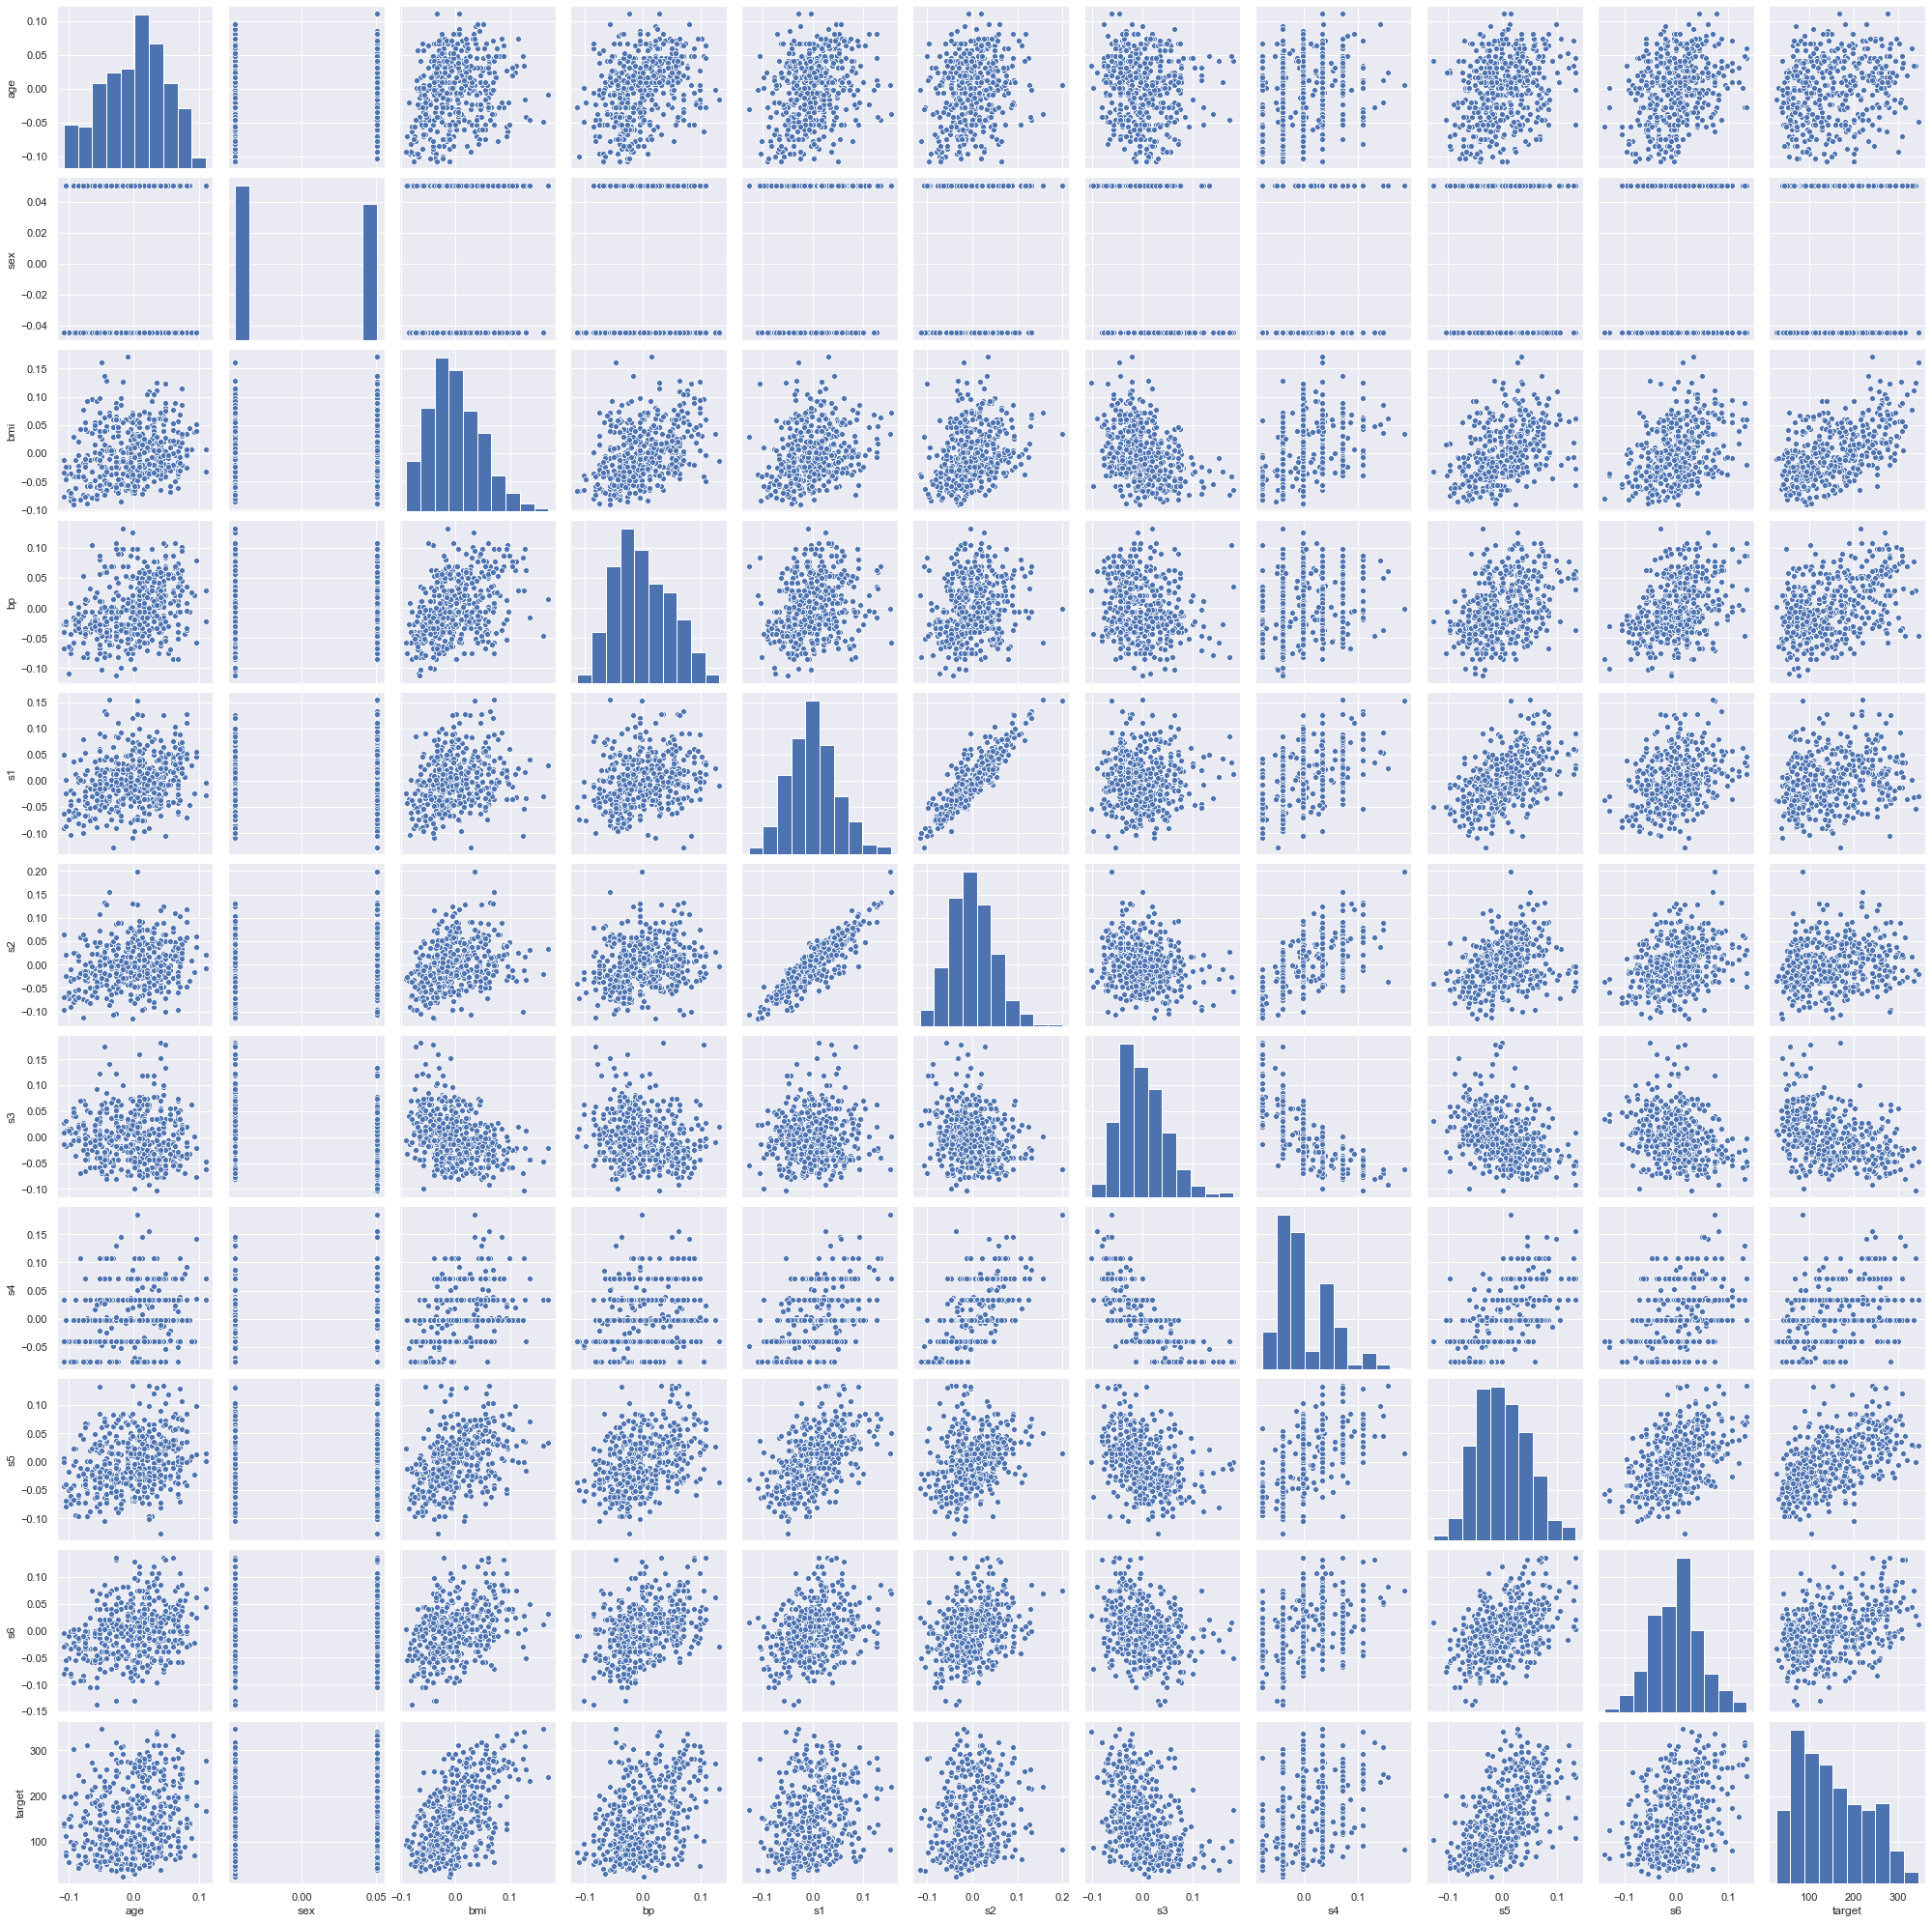

In [4]:
#Lets plot the output
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(data["target"], bins=20, kde=False)

#Lets plot the features
sns.pairplot(data["frame"])

In [5]:
#Lets do a test train split
X = data["frame"].drop("target",axis=1)
y = data["frame"]["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)
print(f"Size of test set = {y_test.shape[0]}")
print(f"Size of train set = {y_train.shape[0]}")

Size of test set = 89
Size of train set = 353


In [6]:
#Lets first standardize the X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Lets build a class to do **PCR**.

In [7]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

class PCR:
    def __init__(self, n_components=2):
        self.n_components_ = n_components
        
    def fit(self, X, y):
        self.pca_ = PCA(n_components=self.n_components_)
        X_pca = self.pca_.fit_transform(X)
        self.lr_ = LinearRegression()
        self.lr_.fit(X_pca, y)
        
    def predict(self, X):
        X_pca = self.pca_.transform(X)
        y_predict = self.lr_.predict(X_pca)
        return y_predict
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)
        

In [8]:
trainR2 = list()
testR2 = list()
nc = range(1, 10)
for n in nc:
    pcr = PCR(n)
    pcr.fit(X_train_std, y_train)
    trainR2.append(pcr.score(X_train_std, y_train))
    testR2.append(pcr.score(X_test_std, y_test))

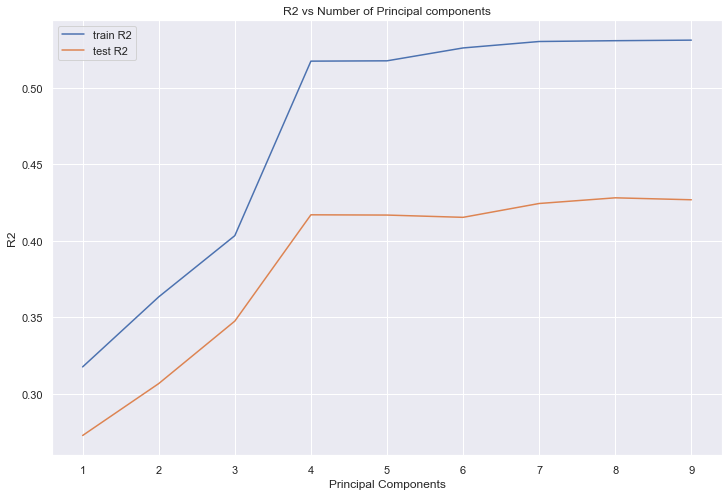

In [9]:
plt.figure(figsize=(12,8))
plt.plot(nc, trainR2, label='train R2')
plt.plot(nc, testR2, label='test R2')
plt.xlabel('Principal Components')
plt.ylabel('R2')
plt.title('R2 vs Number of Principal components')
plt.legend()

We can see from the train data that around 4 PC we get a saturation of R2. Principal Component regression can also be thought of as a regularization method.